In [ ]:
!pip install tensorflow_decision_forests

In [ ]:
import tensorflow as tf
import tensorflow_decision_forests as tfdf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Let's turn off visualication commnets
%matplotlib inline

In [ ]:
print(f"This is TF version we use: {tf.__version__}\n This is Forests version {tfdf.__version__}")

This is TF version we use: 2.16.1
 This is Forests version 1.9.1


##Load the dataset

In [ ]:
train_df = pd.read_csv('/content/train.csv')
print("Train_df shape is: {}".format(train_df.shape))

Train_df shape is: (1460, 81)


In [ ]:
train_df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [ ]:
train_dfc = train_df.copy()
train_dfc = train_dfc.drop('Id', axis=1)
train_dfc.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [ ]:
train_dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

##House Price Distribution - Price

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


<ipython-input-13-b4fcf0d29351>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_dfc['SalePrice'], color='b', bins=100, hist_kws={'alpha': 0.4});


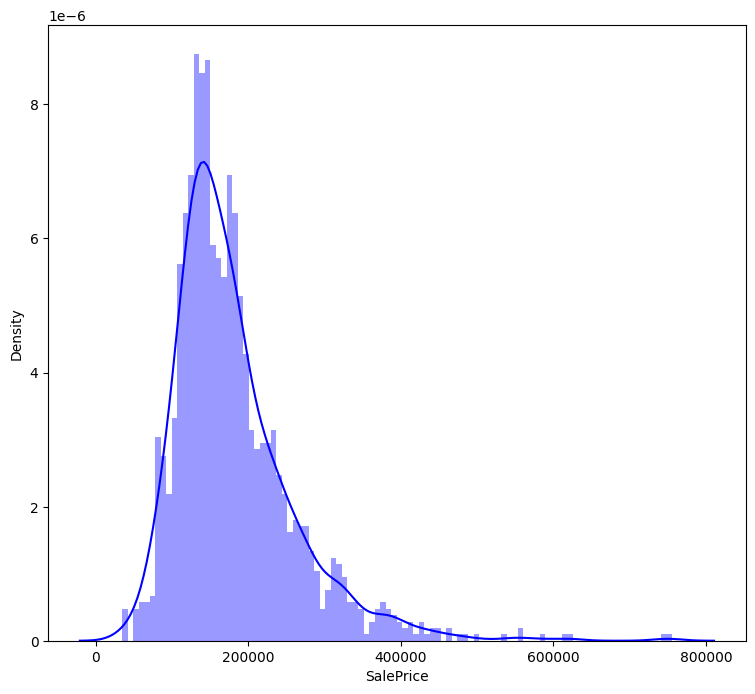

In [ ]:
print(train_dfc['SalePrice'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(train_dfc['SalePrice'], color='b', bins=100, hist_kws={'alpha': 0.4});

##Numerical data distribution

In [ ]:
list(set(train_dfc.dtypes.tolist()))

[dtype('int64'), dtype('O'), dtype('float64')]

In [ ]:
df_numerical = train_dfc.select_dtypes(include = ['float64', 'int64']) # Only float, int
df_numerical.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


array([[<Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>,
        <Axes: title={'center': 'YearBuilt'}>],
       [<Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>,
        <Axes: title={'center': 'TotalBsmtSF'}>],
       [<Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>,
        <Axes: title={'center': 'BsmtHalfBath'}>],
       [<Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,
        <Axes: title={'center': 'Bedroo

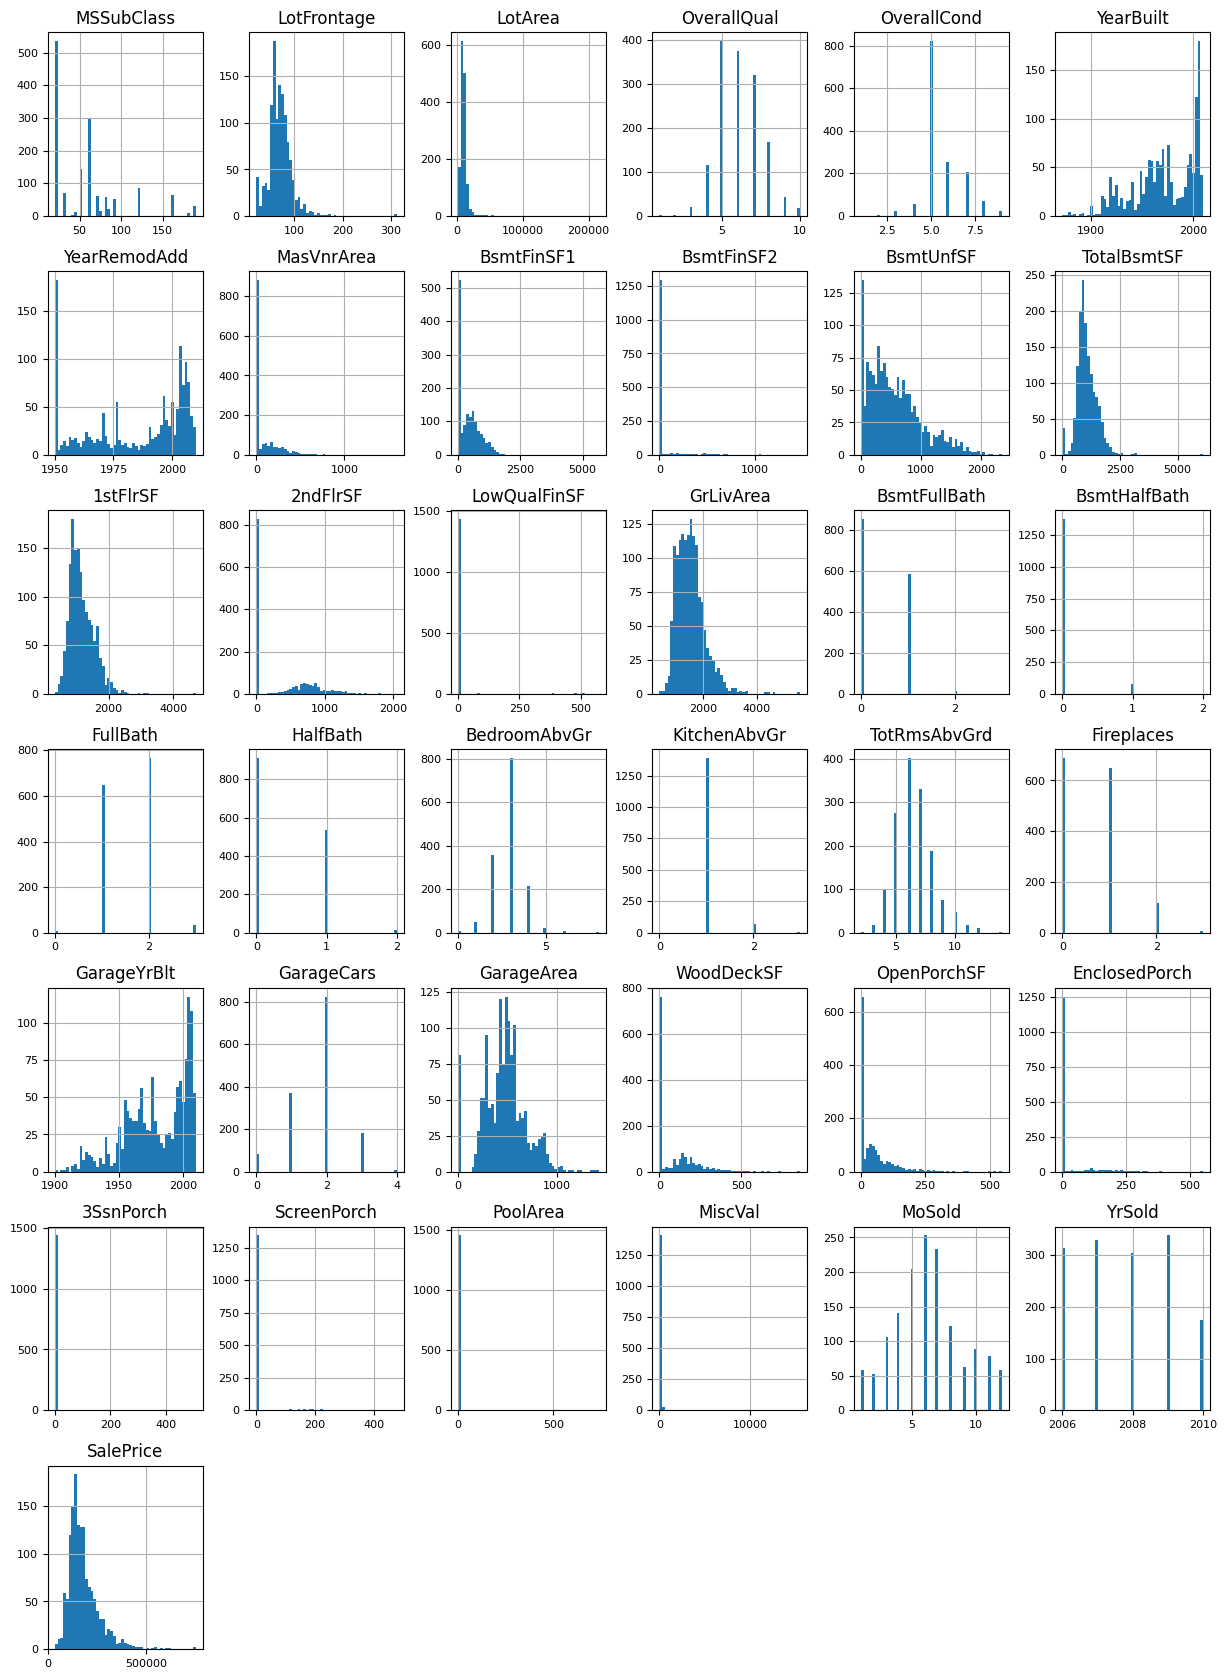

In [ ]:
df_numerical.hist(figsize=(15,21), bins=51, xlabelsize=8, ylabelsize=8)

##Processing dataset

In [ ]:
import numpy as np

def get_valid(dataset, test_ratio=0.30):
  valid_gap = np.random.rand(len(train_dfc)) < test_ratio
  return dataset[~valid_gap], dataset[valid_gap]
train_dfc, valid_dfc = get_valid(train_dfc)
print("{} examples in training, {} examples in testing." .format(len(train_dfc), len(valid_dfc)))

1039 examples in training, 421 examples in testing.


This is the phase where We obtained for our model all the necesary data for creating the model.

In [ ]:
label = 'SalePrice'
train_df = tfdf.keras.pd_dataframe_to_tf_dataset(train_dfc, label=label, task = tfdf.keras.Task.REGRESSION)
valid_df = tfdf.keras.pd_dataframe_to_tf_dataset(valid_dfc, label=label, task = tfdf.keras.Task.REGRESSION)

Configured datasets above

#Model selection COVERS

In [ ]:
tfdf.keras.get_all_models()

[tensorflow_decision_forests.keras.RandomForestModel,
 tensorflow_decision_forests.keras.GradientBoostedTreesModel,
 tensorflow_decision_forests.keras.CartModel,
 tensorflow_decision_forests.keras.DistributedGradientBoostedTreesModel]

In [ ]:
ran_f = tfdf.keras.RandomForestModel(task = tfdf.keras.Task.REGRESSION)
ran_f.compile(metrics=["mse"])

Use /tmp/tmp9g6c1pdm as temporary training directory


#Train stage

In [ ]:
ran_f.fit(x=train_df)

Reading training dataset...
Training dataset read in 0:00:08.498371. Found 1039 examples.
Training model...
Model trained in 0:00:05.032251
Compiling model...
Model compiled.


#Visualizing the model we have

In [ ]:
tfdf.model_plotter.plot_model_in_colab(ran_f, tree_idx=0, max_depth=3)

## Inspecting the model performance

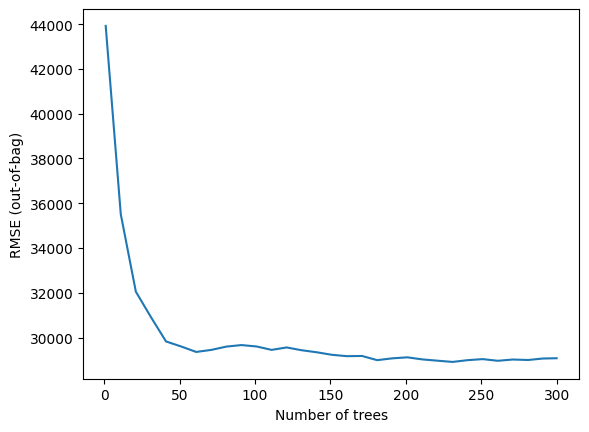

In [ ]:
import matplotlib.pyplot as plt
logs = ran_f.make_inspector().training_logs()
plt.plot([log.num_trees for log in logs], [log.evaluation.rmse for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("RMSE (out-of-bag)")
plt.show()

In [ ]:
inspector_mode = ran_f.make_inspector()
inspector_mode.evaluation()

Evaluation(num_examples=1039, accuracy=None, loss=None, rmse=29074.229816614796, ndcg=None, aucs=None, auuc=None, qini=None)

In [ ]:
evaluation = ran_f.evaluate(x=valid_df, return_dict=True)
for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

1/1 [==============================] - 9s 9s/step - loss: 0.0000e+00 - mse: 804500096.0000
loss: 0.0000
mse: 804500096.0000


#variable importances

In [ ]:
i = 1
print(f"Available variable importances:")
for importance in inspector_mode.variable_importances().keys():
    print(f"IMPORTANCE RATIO:\t {i}\t {importance}")
    i += 1


Available variable importances:
IMPORTANCE RATIO:	 1	 NUM_AS_ROOT
IMPORTANCE RATIO:	 2	 SUM_SCORE
IMPORTANCE RATIO:	 3	 NUM_NODES
IMPORTANCE RATIO:	 4	 INV_MEAN_MIN_DEPTH


In [ ]:
inspector_mode.variable_importances()["NUM_AS_ROOT"]

[("OverallQual" (1; #62), 110.0),
 ("ExterQual" (4; #22), 48.0),
 ("Neighborhood" (4; #59), 47.0),
 ("GarageCars" (1; #32), 39.0),
 ("GrLivArea" (1; #38), 23.0),
 ("GarageArea" (1; #31), 8.0),
 ("TotalBsmtSF" (1; #73), 6.0),
 ("YearBuilt" (1; #76), 6.0),
 ("KitchenQual" (4; #44), 5.0),
 ("BsmtQual" (4; #14), 3.0),
 ("FullBath" (1; #29), 2.0),
 ("1stFlrSF" (1; #0), 1.0),
 ("GarageFinish" (4; #34), 1.0),
 ("GarageYrBlt" (1; #37), 1.0)]

###Plotting the variable of importance ratio

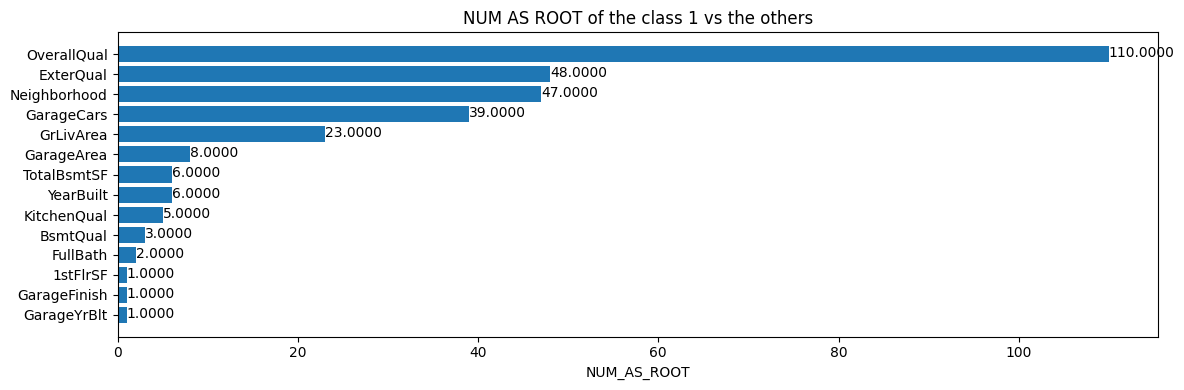

In [ ]:
plt.figure(figsize=(12,4))

variable_importance_metric = "NUM_AS_ROOT"
variable_importances = inspector_mode.variable_importances()[variable_importance_metric]

feature_names = [vi[0].name for vi in variable_importances]
feature_importances = [vi[1] for vi in variable_importances]
feature_ranks = range(len(feature_names))

bar = plt.barh(feature_ranks, feature_importances, label=[str(x) for x in feature_ranks])
plt.yticks(feature_ranks, feature_names)
plt.gca().invert_yaxis()

for importance, patch in zip(feature_importances, bar.patches):
  plt.text(patch.get_x() + patch.get_width(), patch.get_y(), f"{importance:.4f}", va="top")

plt.xlabel(variable_importance_metric)
plt.title("NUM AS ROOT of the class 1 vs the others")
plt.tight_layout()
plt.show()

#Submission of results

In [ ]:
test_data = pd.read_csv('/content/test.csv')
ids = test_data.pop('Id')

test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(
    test_data,
    task = tfdf.keras.Task.REGRESSION)

preds = ran_f.predict(test_ds)
output = pd.DataFrame({'Id': ids,
                       'SalePrice': preds.squeeze()})

output.head()

2/2 [==============================] - 3s 69ms/step


,Id,SalePrice
0,1461,128098.132812
1,1462,148793.265625
2,1463,181057.671875
3,1464,184588.953125
4,1465,193645.000000


In [ ]:
sample_submission_df = pd.read_csv('/content/sample_submission.csv')
sample_submission_df['SalePrice'] = ran_f.predict(test_ds)
sample_submission_df.to_csv('/content/sample_submission_DONE.csv', index=False)
sample_submission_df.head()

2/2 [==============================] - 1s 34ms/step


,Id,SalePrice
0,1461,128098.132812
1,1462,148793.265625
2,1463,181057.671875
3,1464,184588.953125
4,1465,193645.000000
